Activity 3 (Wednesday)
As a reminder the objective of this study is to predict the total claim amount of a customer and study/investigate the impact of the factors (input features) on the target variable(total claim amount). That means in your exploratory data analysis, you have to look for patterns in this data that show interesting relationships among the input features as well as with relation to the target feature.

Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use "np.number" and "object" to select the numerical data types and categorical data types respectively)
Now we will try to check the normality of the numerical variables visually
Use the Seaborn library to construct distribution plots for the numerical variables
Use the Matplotlib library to construct histograms.
Do the distributions for different numerical variables look like a normal distribution?
For the numerical variables, check for correlation between the input features. Note: this does not include the target feature (total claim amount).
Plot the Correlation Heatmap.
(Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

Steps: 
Split to numerical and categorical 
then I focus on the numerical variables

In [1]:
# import libraries to use (pandas, matplotlib.pyplot and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("df4_cleaned.csv")

In [3]:
data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
1,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
2,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2011-02-14,Employed,M,50549,...,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2
3,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
4,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
5424,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
5425,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
5426,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [4]:
object_data = data.select_dtypes('object')
object_data

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
1,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
2,HO81102,NaN,NaN,Basic,High School or Below,2011-02-14,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,A
3,HG93801,Arizona,No,Extended,High School or Below,2011-01-02,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
4,KR82385,California,No,Basic,Master,2011-01-26,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,SU71163,Arizona,No,Basic,College,2011-01-07,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
5424,QI63521,Nevada,No,Basic,High School or Below,2011-02-24,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
5425,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
5426,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


In [5]:
numeric_data = data.select_dtypes('float64')
numeric_data

,customer lifetime value,months since last claim,number of open complaints,total claim amount
0,14947.917300,34.0,0.0,480.000000
1,22332.439460,10.0,0.0,484.013411
2,4745.181764,2.0,0.0,292.800000
3,5154.764074,13.0,0.0,442.521087
4,5454.587929,25.0,0.0,331.200000
...,...,...,...,...
5423,2771.663013,30.0,4.0,355.200000
5424,19228.463620,14.0,0.0,897.600000
5425,15563.369440,NaN,NaN,1214.400000
5426,5259.444853,7.0,0.0,273.018929


Do the distributions for different numerical variables look like a normal distribution? 
After doing the quick panda histogram, it looks like no. 

array([[<Axes: title={'center': 'customer lifetime value'}>,
        <Axes: title={'center': 'months since last claim'}>],
       [<Axes: title={'center': 'number of open complaints'}>,
        <Axes: title={'center': 'total claim amount'}>]], dtype=object)

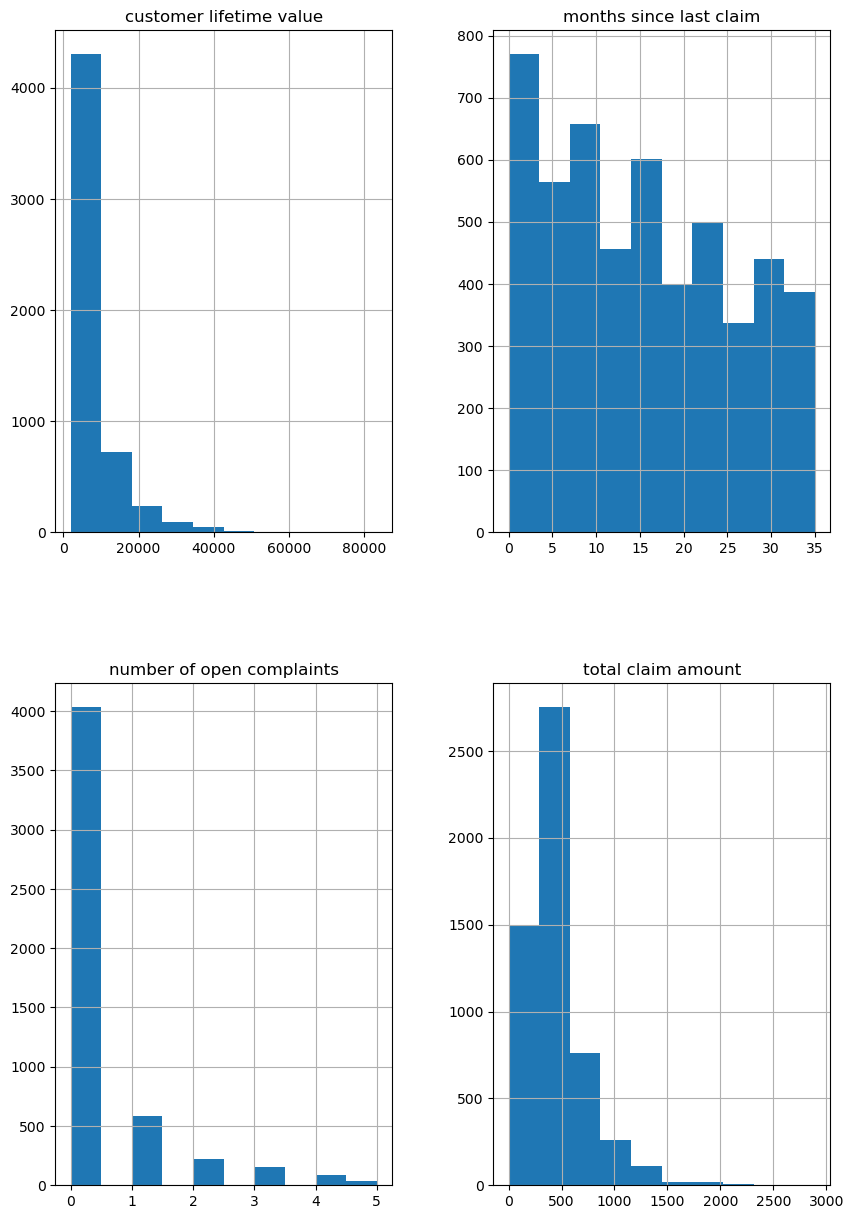

In [6]:
numeric_data.hist(figsize=(10,15))

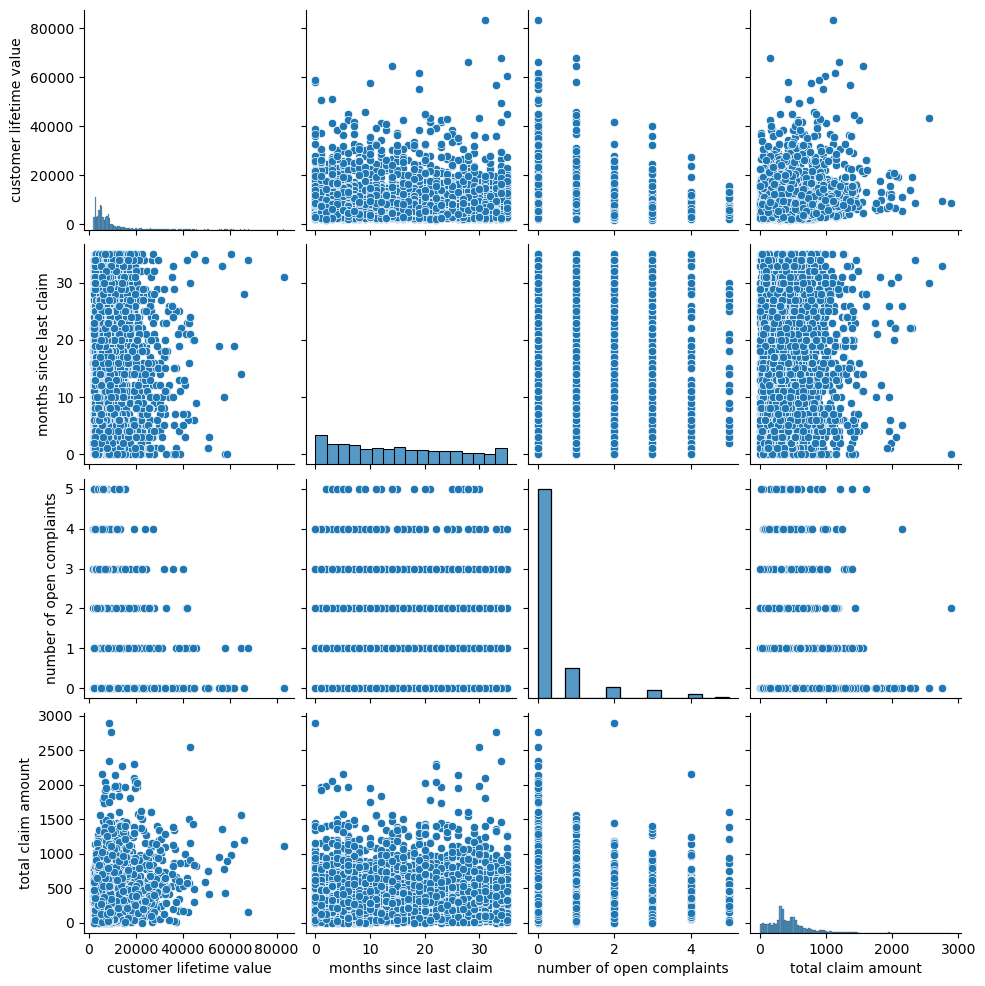

In [8]:
sns.pairplot(numeric_data)

Correlation between the input factors:
Open complaints and customer value? 

<Axes: xlabel='number of open complaints', ylabel='customer lifetime value'>

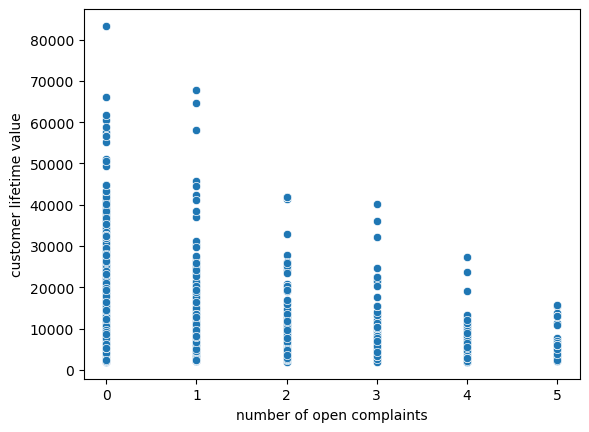

In [13]:
sns.scatterplot(data=numeric_data, x="number of open complaints", y="customer lifetime value")

Correlation between months since last claim and number of open complaints: 

<Axes: xlabel='months since last claim', ylabel='number of open complaints'>

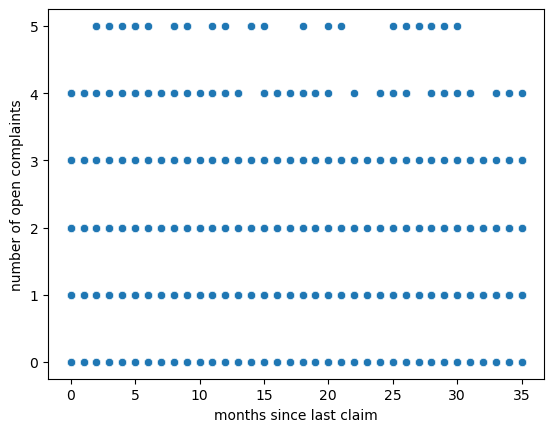

In [15]:
sns.scatterplot(data=numeric_data, x="months since last claim", y="number of open complaints")

In [ ]:
months since last claim'}>],
       [<Axes: title={'center': 'number of open complaints'

Correlation Heatmap: 

<Axes: >

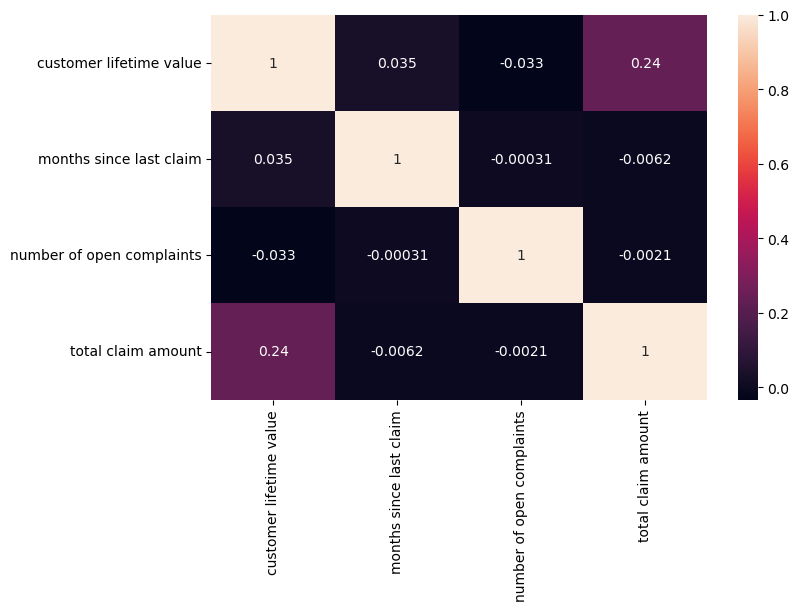

In [16]:
fig=plt.figure(figsize=(8,5))    #for the heat map we should only put numerical values not categorical
sns.heatmap(numeric_data.corr(),annot=True)